# Data Visualization

## Assignment 4: Final Project

### Requirements:
- We will finish this class by giving you the chance to use what you have learned in a practical context, by creating data visualizations from raw data. 
- Choose a dataset of interest from the [City of Toronto’s Open Data Portal](https://www.toronto.ca/city-government/data-research-maps/open-data/) or [Ontario’s Open Data Catalogue](https://data.ontario.ca/). 
- Using Python and one other data visualization software (Excel or free alternative, Tableau Public, any other tool you prefer), create two distinct visualizations from your dataset of choice.

### Data Set
The selected data represents parking tickets issued in Ontario in 2022. The data is divided into eight different CSV files, and this exercise includes joining the data contained in them for further data visualization and analysis.

Link: https://open.toronto.ca/dataset/parking-tickets/

### Visualization using Python

In [ ]:
import pandas as pd
import os

# List of CSV files to combine
csv_files = [
    "Parking_Tags_Data_2022.000.csv", "Parking_Tags_Data_2022.001.csv", "Parking_Tags_Data_2022.002.csv", "Parking_Tags_Data_2022.003.csv", "Parking_Tags_Data_2022.004.csv", "Parking_Tags_Data_2022.005.csv", "Parking_Tags_Data_2022.006.csv", "Parking_Tags_Data_2022.007.csv",]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through the list of CSV files and read them into individual DataFrames
for file in csv_files:
    if os.path.exists(file):
        df = pd.read_csv(file)
        dataframes.append(df)
    else:
        print(f"Warning: {file} does not exist.")

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_output.csv", index=False)

print("CSV files combined successfully into 'combined_output.csv'")


CSV files combined successfully into 'combined_output.csv'


Below is the data visualization exercise for the selected dataset

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Importing CSV file
df = pd.read_csv("combined_output.csv", on_bad_lines='skip')
print(df.head())  # Display the first few rows of the dataframe to verify import

# Filtering data for Ontario province
ontario_df = df[df['province'] == 'ON']

# Converting date_of_infraction to datetime format and extracting month
ontario_df['date_of_infraction'] = pd.to_datetime(ontario_df['date_of_infraction'], format='%Y%m%d')
ontario_df['month'] = ontario_df['date_of_infraction'].dt.month

# Aggregating data to count the number of tickets by month
monthly_counts = ontario_df['month'].value_counts().sort_index()

# Mapping month numbers to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x1 = [month_names[month - 1] for month in monthly_counts.index]
y1 = monthly_counts.values

# Creating the Bar plot using Plotly with the same color for all bars (June color)
graph = go.Figure()
graph.add_trace(go.Bar(x=x1, y=y1, marker_color='#19D3F3'))

graph.update_layout(
    title={'text': 'Number of Tickets in Ontario in 2022', 'y': 0.9, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top', 'font': {'size': 20, 'weight': 'bold'}},
    xaxis_title='Month',
    yaxis_title='Number of Tickets',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Number of Tickets')
)

graph.show()

  tag_number_masked  date_of_infraction  infraction_code  \
0          ***73863            20220101               29   
1          ***46942            20220101               15   
2          ***73864            20220101               29   
3          ***63914            20220101                9   
4          ***73865            20220101               29   

           infraction_description  set_fine_amount  time_of_infraction  \
0  PARK PROHIBITED TIME NO PERMIT               30                 3.0   
1  PARK-WITHIN 3M OF FIRE HYDRANT              100                 5.0   
2  PARK PROHIBITED TIME NO PERMIT               30                 5.0   
3  STOP-SIGNED HWY-PROHIBIT TM/DY              100                 6.0   
4  PARK PROHIBITED TIME NO PERMIT               30                 6.0   

  location1           location2 location3 location4 province  
0       OPP   233 COLERIDGE AVE       NaN       NaN       ON  
1        NR  25 TOWN CENTRE CRT       NaN       NaN       ON  
2    

/var/folders/qv/krqt3swd09g8_y9cbl_y4syc0000gp/T/ipykernel_47398/2082997019.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ontario_df['date_of_infraction'] = pd.to_datetime(ontario_df['date_of_infraction'], format='%Y%m%d')
/var/folders/qv/krqt3swd09g8_y9cbl_y4syc0000gp/T/ipykernel_47398/2082997019.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ontario_df['month'] = ontario_df['date_of_infraction'].dt.month


1. What software did you use to create your data visualization?
Python.

2. Who is your intended audience?
The audience includes policymakers, transportation authorities, community planners, and public safety officials who need insights into traffic ticketing trends in Ontario.

3. What information or message are you trying to convey with your visualization?
The number of tickets issued monthly in Ontario for 2022, highlighting trends and fluctuations over the year.

4. What design principles did you consider and how were they applied?

-   Substantive: The data was displayed accurately to reflect ticket counts each month.
-   Perceptual: Bar charts were used for their simplicity in comparing monthly values. Consistent colors were applied to improve readability.
-   Aesthetic: A clear, uncluttered design with descriptive labels was used to enhance understanding.

5. How did you ensure that your visualizations are reproducible?
The Python visualization is reproducible because the code can be rerun or adapted to new data. This ensures consistent and efficient reproducibility.

6. How did you ensure accessibility?
I made the Python chart accessible by including descriptive titles, readable fonts, and sufficient color contrast. The addition of alt text can make it usable for individuals relying on screen readers.

7. Who are the individuals and communities impacted?
The communities impacted include drivers, law enforcement, policymakers, and the general public, as this visualization informs stakeholders about traffic trends and can be used to improve public safety.

8. How did you choose what features to include or exclude?
I included monthly ticket data to provide a clear view of trends. Specific details like ticket types or geographic breakdowns were excluded to maintain simplicity and focus.

9. What ‘underwater labour’ contributed to your final product?

- Data Cleaning: Ensuring data was formatted correctly and error-free.
- Writing Code: Creating a Jupyter notebook while using Python libraries.
- Data Handling: Processing the dataset efficiently to avoid performance issues.


### Visualization using Excel

The graph below is a visualization created using the same dataset in Excel.  

One of the main advantages of using Python is its ability to handle larger datasets. For this example, I was able to create a graph using data for the entire year.  

In contrast, for the Excel graph, due to the large size of the "combined_output.csv" file, I was only able to plot the tickets issued in Ontario between January and July.  

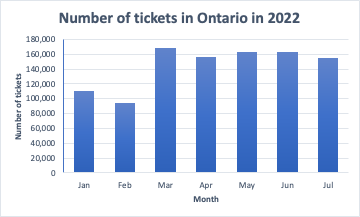

1. What software did you use to create your data visualization?
I used Excel for the ticket data visualization.

2. Who is your intended audience?
The audience includes transportation authorities and policymakers interested in understanding ticket trends, particularly for the January to July timeframe.

3. What information or message are you trying to convey?
The Excel chart shows the number of tickets issued in Ontario from January to July 2022, providing a partial view of the year’s trend.

4. What design principles did you consider and how were they applied?

-   Substantive: Focused on presenting data accurately for the given period.
-   Perceptual: Used a bar chart for easy comparison. Color was kept consistent for clarity.
-   Simple design: with clear labels and titles for easy interpretation.

5. How did you ensure that your visualizations are reproducible?
Excel visualizations are not easily reproducible, as creating or updating charts manually requires more effort. Changes to the dataset require the chart to be remade, impacting consistency.

6. How did you ensure accessibility?
To make the Excel chart accessible, I used readable fonts, proper contrast, and descriptive labels. The colors were selected to be easily distinguishable.

7. Who are the individuals and communities impacted?
The impacted communities include drivers, enforcement authorities, and policymakers. This data may influence public safety strategies and traffic regulations.

8. How did you choose what features to include or exclude?
Only data from January to July was included to avoid Excel's limitations with larger datasets. Additional features like ticket types were excluded to maintain a simple, focused visualization.

9. What ‘underwater labour’ contributed to your final product?

-   Data Reduction: Reduced the dataset for Excel’s handling capabilities.
-   Manual Chart Creation: Formatted the chart by selecting ranges, colors, and adding labels.


- This assignment is intentionally open-ended - you are free to create static or dynamic data visualizations, maps, or whatever form of data visualization you think best communicates your information to your audience of choice! 
- Total word count should not exceed **(as a maximum) 1000 words** 
 
### Why am I doing this assignment?:  
- This ongoing assignment ensures active participation in the course, and assesses the learning outcomes: 
* Create and customize data visualizations from start to finish in Python
* Apply general design principles to create accessible and equitable data visualizations
* Use data visualization to tell a story  
- This would be a great project to include in your GitHub Portfolio – put in the effort to make it something worthy of showing prospective employers!

### Rubric:

| Component         | Scoring  | Requirement                                                                 |
|-------------------|----------|-----------------------------------------------------------------------------|
| Data Visualizations | Complete/Incomplete | - Data visualizations are distinct from each other<br>- Data visualizations are clearly identified<br>- Different sources/rationales (text with two images of data, if visualizations are labeled)<br>- High-quality visuals (high resolution and clear data)<br>- Data visualizations follow best practices of accessibility |
| Written Explanations | Complete/Incomplete | - All questions from assignment description are answered for each visualization<br>- Explanations are supported by course content or scholarly sources, where needed |
| Code              | Complete/Incomplete | - All code is included as an appendix with your final submissions<br>- Code is clearly commented and reproducible |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-4`
* What to submit for this assignment:
    * A folder/directory containing:
        * This file (assignment_4.md)
        * Two data visualizations 
        * Two markdown files for each both visualizations with their written descriptions.
        * Link to your dataset of choice.
        * Complete and commented code as an appendix (for your visualization made with Python, and for the other, if relevant) 
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/visualization/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Create a branch called `assignment-4`.
- [ ] Ensure that the repository is public.
- [ ] Review [the PR description guidelines](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md#guidelines-for-pull-request-descriptions) and adhere to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
